# Projet Vendée Globe par Mahmoud Benboubker - MS BGD

##  Classement de la Vendée Globe

### Web Scrapping

La page https://www.vendeeglobe.org/fr/classement donne un classement quasi temps réel de la course (update 6 fois par jour). Ce classement est récupérable en format .xlsv  
L'historique des classements se trouve dans "combobox". Il serait intéressant de pouvoir télécharger les classements depuis le combobox.

##### Classement le plus récent

Tout d'abord, nous allons téléchargé le classement le plus récent.

In [1]:
import requests
from bs4 import BeautifulSoup

website = 'https://www.vendeeglobe.org'
req = requests.get(website + '/fr/classement')
soup = BeautifulSoup(req.content)

Après avoir récupéré le contenu de la page, on doit maintenant trouver le lien du fichier Excel. 

In [2]:
link_ref = soup.find('a', {"class": "rankings__download"})
link_ref = link_ref.attrs["href"]
link = website + link_ref
link

'https://www.vendeeglobe.org/download-race-data/vendeeglobe_20201125_210000.xlsx'

Maintenant, on télécharge le document

In [3]:
## Récupération du nom du fichier
filename = link.split('/')[-1]

r = requests.get(link, allow_redirects=True)
open("./data/classements/"+filename, 'wb').write(r.content)

73564

On vérifie bien que le fichier a bien été téléchargé

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_excel("./data/classements/"+filename)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Classement du mercredi 25 novembre 2020 à 22h0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,NaN,NaN,NaN,Depuis 30 minutes\nSince 30 minutes,NaN,NaN,...,Depuis le dernier classement\nSince the the la...,NaN,NaN,NaN,Depuis 24 heures\nSince 24 hours,NaN,NaN,NaN,DTF,DTL
3,NaN,NaN,NaN,NaN,Heure FR\nHour FR,Latitude\nLatitude,Longitude\nLongitude,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,...,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,NaN,NaN
4,NaN,1,\nFRA 79,Charlie Dalin\nAPIVIA,21:30 FR\n,37°26.88'S,15°06.14'W,104°,7.4 kts,7.2 kts,...,117°,7.7 kts,7.7 kts,30.7 nm,150°,8.6 kts,7.5 kts,205.8 nm,18929.3 nm,0.0 nm
5,NaN,2,\nFRA 59,Thomas Ruyant\nLinkedOut,21:00 FR\n-30min,35°24.48'S,15°54.50'W,201°,10.9 kts,1.8 kts,...,142°,6.5 kts,6.1 kts,22.7 nm,151°,7.7 kts,6.9 kts,185.7 nm,19022.8 nm,93.4 nm
6,NaN,3,\nFRA 01,Jean Le Cam\nYes we Cam !,21:30 FR\n,31°04.09'S,19°12.92'W,197°,8.2 kts,2.5 kts,...,173°,5.6 kts,3.8 kts,22.4 nm,134°,5.0 kts,5.0 kts,121.0 nm,19303.3 nm,374.0 nm
7,NaN,4,\nFRA 85,Kevin Escoffier\nPRB,21:30 FR\n,31°49.09'S,22°23.02'W,191°,10.6 kts,4.2 kts,...,199°,9.8 kts,2.6 kts,39.1 nm,190°,6.1 kts,2.7 kts,146.9 nm,19411.4 nm,482.1 nm
8,NaN,5,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,21:30 FR\n,31°18.01'S,22°26.72'W,188°,10.0 kts,4.5 kts,...,198°,9.9 kts,2.9 kts,39.4 nm,192°,6.9 kts,2.9 kts,165.2 nm,19431.6 nm,502.3 nm
9,NaN,6,\nFRA 17,Yannick Bestaven\nMaître Coq IV,21:30 FR\n,31°10.89'S,22°27.19'W,199°,9.7 kts,2.6 kts,...,203°,9.7 kts,2.1 kts,38.9 nm,192°,6.6 kts,2.8 kts,158.4 nm,19436.0 nm,506.7 nm


##### Classements historiques

Tout d'abord, nous allons mettre le script précédent dans une fonction en ajoutant le jour et l'heure

In [6]:
def recuperation_classement_historique(heure_date):
    print(heure_date)
    website = 'https://www.vendeeglobe.org'
    req = requests.get(website + '/fr/classement/'+heure_date)
    soup = BeautifulSoup(req.content)
    link_ref = soup.find('a', {"class": "rankings__download"})
    if link_ref: ## pour eviter les erreurs si certaines pages n'ont pas de fichiers excel
        link_ref = link_ref.attrs["href"]
        link = website + link_ref
        filename = link.split('/')[-1]
        r = requests.get(link, allow_redirects=True)
        open("./data/classements/"+filename, 'wb').write(r.content)

Récupération du combobox

In [7]:
combobox_ref = soup.find('select', {"class": "form__input m--select onsubmit-rank"})
combobox_ref

<select class="form__input m--select onsubmit-rank" data-uri="/fr/classement">
<option value="">Précédents classements</option>
<option value="20201125_210000">- 2020-11-25 21:00:00</option><option value="20201125_170000">- 2020-11-25 17:00:00</option><option value="20201125_140000">- 2020-11-25 14:00:00</option><option value="20201125_110000">- 2020-11-25 11:00:00</option><option value="20201125_080000">- 2020-11-25 08:00:00</option><option value="20201125_040000">- 2020-11-25 04:00:00</option><option value="20201124_210000">- 2020-11-24 21:00:00</option><option value="20201124_170000">- 2020-11-24 17:00:00</option><option value="20201124_140000">- 2020-11-24 14:00:00</option><option value="20201124_110000">- 2020-11-24 11:00:00</option><option value="20201124_080000">- 2020-11-24 08:00:00</option><option value="20201124_040000">- 2020-11-24 04:00:00</option><option value="20201123_210000">- 2020-11-23 21:00:00</option><option value="20201123_170000">- 2020-11-23 17:00:00</option><opt

In [8]:
historique_list = combobox_ref.find_all('option')
historique_list

[<option value="">Précédents classements</option>,
 <option value="20201125_210000">- 2020-11-25 21:00:00</option>,
 <option value="20201125_170000">- 2020-11-25 17:00:00</option>,
 <option value="20201125_140000">- 2020-11-25 14:00:00</option>,
 <option value="20201125_110000">- 2020-11-25 11:00:00</option>,
 <option value="20201125_080000">- 2020-11-25 08:00:00</option>,
 <option value="20201125_040000">- 2020-11-25 04:00:00</option>,
 <option value="20201124_210000">- 2020-11-24 21:00:00</option>,
 <option value="20201124_170000">- 2020-11-24 17:00:00</option>,
 <option value="20201124_140000">- 2020-11-24 14:00:00</option>,
 <option value="20201124_110000">- 2020-11-24 11:00:00</option>,
 <option value="20201124_080000">- 2020-11-24 08:00:00</option>,
 <option value="20201124_040000">- 2020-11-24 04:00:00</option>,
 <option value="20201123_210000">- 2020-11-23 21:00:00</option>,
 <option value="20201123_170000">- 2020-11-23 17:00:00</option>,
 <option value="20201123_140000">- 2020

In [9]:
## On supprime le premier élément car il ne contient pas de valeurs
historique_list.pop(0)
historique_date_heure = [tag.attrs['value'] for tag in historique_list]
historique_date_heure

['20201125_210000',
 '20201125_170000',
 '20201125_140000',
 '20201125_110000',
 '20201125_080000',
 '20201125_040000',
 '20201124_210000',
 '20201124_170000',
 '20201124_140000',
 '20201124_110000',
 '20201124_080000',
 '20201124_040000',
 '20201123_210000',
 '20201123_170000',
 '20201123_140000',
 '20201123_110000',
 '20201123_080000',
 '20201123_040000',
 '20201122_210000',
 '20201122_170000',
 '20201122_140000',
 '20201122_110000',
 '20201122_080000',
 '20201122_040000',
 '20201121_210000',
 '20201121_170000',
 '20201121_140000',
 '20201121_110000',
 '20201121_080000',
 '20201121_040000',
 '20201120_210000',
 '20201120_170000',
 '20201120_140000',
 '20201120_110000',
 '20201120_080000',
 '20201120_040000',
 '20201119_210000',
 '20201119_170000',
 '20201119_140000',
 '20201119_110000',
 '20201119_080000',
 '20201119_040000',
 '20201118_210000',
 '20201118_170000',
 '20201118_140000',
 '20201118_110000',
 '20201118_080000',
 '20201118_040000',
 '20201117_210000',
 '20201117_170000',


On applique à la fonction *recuperation_classement_historique(heure_date)* tous les éléments de la liste *historique_date_heure*  
Mais avant, on vérifie l'état de notre répertoire

In [10]:
import os
print(os.listdir('./data/classements'))

['vendeeglobe_20201125_210000.xlsx']


Le répertoire ne contient que le classement le plus récent. Ajoutons les classements historiques.

In [11]:
for elt in historique_date_heure:
    recuperation_classement_historique(elt)

20201125_210000
20201125_170000
20201125_140000
20201125_110000
20201125_080000
20201125_040000
20201124_210000
20201124_170000
20201124_140000
20201124_110000
20201124_080000
20201124_040000
20201123_210000
20201123_170000
20201123_140000
20201123_110000
20201123_080000
20201123_040000
20201122_210000
20201122_170000
20201122_140000
20201122_110000
20201122_080000
20201122_040000
20201121_210000
20201121_170000
20201121_140000
20201121_110000
20201121_080000
20201121_040000
20201120_210000
20201120_170000
20201120_140000
20201120_110000
20201120_080000
20201120_040000
20201119_210000
20201119_170000
20201119_140000
20201119_110000
20201119_080000
20201119_040000
20201118_210000
20201118_170000
20201118_140000
20201118_110000
20201118_080000
20201118_040000
20201117_210000
20201117_170000
20201117_140000
20201117_110000
20201117_080000
20201117_040000
20201116_210000
20201116_170000
20201116_140000
20201116_110000
20201116_080000
20201116_040000
20201115_210000
20201115_170000
20201115

On remarque que certaines pages ne possèdent plus de fichiers Excel, on va donc les ignorer pour ne pas générer de problèmes lors de la génération du script  
*https://www.vendeeglobe.org/fr/classement/20201116_110000* ne nous donne plus la possibilité de générer un fichier excel

In [12]:
print(os.listdir('./data/classements'))

['vendeeglobe_20201108_140000.xlsx', 'vendeeglobe_20201108_170000.xlsx', 'vendeeglobe_20201108_210000.xlsx', 'vendeeglobe_20201109_040000.xlsx', 'vendeeglobe_20201109_080000.xlsx', 'vendeeglobe_20201109_110000.xlsx', 'vendeeglobe_20201109_140000.xlsx', 'vendeeglobe_20201109_170000.xlsx', 'vendeeglobe_20201109_210000.xlsx', 'vendeeglobe_20201110_040000.xlsx', 'vendeeglobe_20201110_080000.xlsx', 'vendeeglobe_20201110_110000.xlsx', 'vendeeglobe_20201110_140000.xlsx', 'vendeeglobe_20201110_170000.xlsx', 'vendeeglobe_20201110_210000.xlsx', 'vendeeglobe_20201111_040000.xlsx', 'vendeeglobe_20201111_080000.xlsx', 'vendeeglobe_20201111_110000.xlsx', 'vendeeglobe_20201111_140000.xlsx', 'vendeeglobe_20201111_170000.xlsx', 'vendeeglobe_20201111_210000.xlsx', 'vendeeglobe_20201112_040000.xlsx', 'vendeeglobe_20201112_080000.xlsx', 'vendeeglobe_20201112_110000.xlsx', 'vendeeglobe_20201112_140000.xlsx', 'vendeeglobe_20201112_170000.xlsx', 'vendeeglobe_20201112_210000.xlsx', 'vendeeglobe_20201113_04000

La récupération des fichiers excel a été faite avec succès

####  Nettoyage Données

Prenons le premier fichier se trouvant le répertoire "*data/classements*"

In [13]:
first_file = os.listdir('./data/classements')[0]
df_classement = pd.read_excel("./data/classements/"+first_file)
df_classement.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Classement du dimanche 08 novembre 2020 à 16h0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,NaN,NaN,NaN,Depuis 30 minutes\nSince 30 minutes,NaN,NaN,...,Depuis le dernier classement\nSince the the la...,NaN,NaN,NaN,Depuis 24 heures\nSince 24 hours,NaN,NaN,NaN,DTF,DTL
3,NaN,NaN,NaN,NaN,Heure FR\nHour FR,Latitude\nLatitude,Longitude\nLongitude,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,...,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,NaN,NaN
4,NaN,1,\nFRA 18,Louis Burton\nBureau Vallée 2,15:30 FR\n,46°24.46'N,01°50.48'W,241°,17.7 kts,17.5 kts,...,357°,0.0 kts,0.0 kts,2788.0 nm,201°,0.3 kts,0.3 kts,6.1 nm,24293.9 nm,0.0 nm


Il y a un problème au niveau des colonnes, on les crée manuellement

In [14]:
columns = ['Rank', 'Nat', 'Skipper', 'Lat', 'Long', 'Cap', 'Vitesse (kts)','VMG', 'Dist_arrivée (nm)', 'DTF', 'DTL']
df_classement = pd.read_excel("./data/classements/"+first_file, skiprows=range(4), usecols=[1, 2, 3, 5, 6, 7, 8, 9, 10, 19, 20], encoding='utf-8', names=columns)
df_classement.head()

,Rank,Nat,Skipper,Lat,Long,Cap,Vitesse (kts),VMG,Dist_arrivée (nm),DTF,DTL
0,1,\nFRA 18,Louis Burton\nBureau Vallée 2,46°24.46'N,01°50.48'W,241°,17.7 kts,17.5 kts,0.3 nm,24293.9 nm,0.0 nm
1,2,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,46°24.34'N,01°49.82'W,241°,11.1 kts,10.9 kts,0.4 nm,24294.2 nm,0.4 nm
2,3,\nFRA 8,Jérémie Beyou\nCharal,46°24.91'N,01°49.99'W,244°,15.5 kts,15.5 kts,0.5 nm,24294.3 nm,0.5 nm
3,4,\nFRA 59,Thomas Ruyant\nLinkedOut,46°24.71'N,01°49.68'W,244°,13.2 kts,13.1 kts,0.7 nm,24294.5 nm,0.6 nm
4,5,\nFRA 53,Maxime Sorel\nV And B Mayenne,46°24.59'N,01°49.56'W,246°,10.9 kts,10.9 kts,0.2 nm,24294.5 nm,0.6 nm


In [15]:
df_classement["Bateau"] = df_classement["Skipper"].apply(lambda x : str(x).split("\n")[-1])
df_classement.head()

,Rank,Nat,Skipper,Lat,Long,Cap,Vitesse (kts),VMG,Dist_arrivée (nm),DTF,DTL,Bateau
0,1,\nFRA 18,Louis Burton\nBureau Vallée 2,46°24.46'N,01°50.48'W,241°,17.7 kts,17.5 kts,0.3 nm,24293.9 nm,0.0 nm,Bureau Vallée 2
1,2,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,46°24.34'N,01°49.82'W,241°,11.1 kts,10.9 kts,0.4 nm,24294.2 nm,0.4 nm,Seaexplorer - Yacht Club De Monaco
2,3,\nFRA 8,Jérémie Beyou\nCharal,46°24.91'N,01°49.99'W,244°,15.5 kts,15.5 kts,0.5 nm,24294.3 nm,0.5 nm,Charal
3,4,\nFRA 59,Thomas Ruyant\nLinkedOut,46°24.71'N,01°49.68'W,244°,13.2 kts,13.1 kts,0.7 nm,24294.5 nm,0.6 nm,LinkedOut
4,5,\nFRA 53,Maxime Sorel\nV And B Mayenne,46°24.59'N,01°49.56'W,246°,10.9 kts,10.9 kts,0.2 nm,24294.5 nm,0.6 nm,V And B Mayenne


In [16]:
df_classement["Skipper"] = df_classement["Skipper"].apply(lambda x : str(x).split("\n")[0])
df_classement.drop(index=range(33, 37), inplace=True)

In [17]:
df_classement["Nat"] = df_classement["Nat"].apply(lambda x : str(x).split("\n")[1])
df_classement

,Rank,Nat,Skipper,Lat,Long,Cap,Vitesse (kts),VMG,Dist_arrivée (nm),DTF,DTL,Bateau
0,1,FRA 18,Louis Burton,46°24.46'N,01°50.48'W,241°,17.7 kts,17.5 kts,0.3 nm,24293.9 nm,0.0 nm,Bureau Vallée 2
1,2,MON 10,Boris Herrmann,46°24.34'N,01°49.82'W,241°,11.1 kts,10.9 kts,0.4 nm,24294.2 nm,0.4 nm,Seaexplorer - Yacht Club De Monaco
2,3,FRA 8,Jérémie Beyou,46°24.91'N,01°49.99'W,244°,15.5 kts,15.5 kts,0.5 nm,24294.3 nm,0.5 nm,Charal
3,4,FRA 59,Thomas Ruyant,46°24.71'N,01°49.68'W,244°,13.2 kts,13.1 kts,0.7 nm,24294.5 nm,0.6 nm,LinkedOut
4,5,FRA 53,Maxime Sorel,46°24.59'N,01°49.56'W,246°,10.9 kts,10.9 kts,0.2 nm,24294.5 nm,0.6 nm,V And B Mayenne
5,6,FRA 56,Fabrice Amedeo,46°25.19'N,01°49.87'W,238°,16.9 kts,16.9 kts,0.6 nm,24294.5 nm,0.7 nm,Newrest - Art et Fenetres
6,7,FRA 01,Jean Le Cam,46°24.90'N,01°49.49'W,247°,10.7 kts,10.7 kts,0.2 nm,24294.7 nm,0.8 nm,Yes we Cam !
7,8,GBR 99,Alex Thomson,46°25.21'N,01°49.45'W,238°,13.8 kts,13.7 kts,1.1 nm,24294.8 nm,1.0 nm,Hugo Boss
8,9,FRA 69,Sébastien Destremau,46°25.04'N,01°49.32'W,245°,9.6 kts,9.6 kts,0.3 nm,24294.8 nm,1.0 nm,Merci
9,10,GBR 777,Pip Hare,46°25.22'N,01°49.36'W,245°,12.7 kts,12.7 kts,0.4 nm,24294.9 nm,1.0 nm,Medallia


In [18]:
import datetime

In [19]:
def clean_bateau(filename):
    columns = ['Rank', 'Nat', 'Skipper', 'Lat', 'Long', 'Cap', 'Vitesse (kts)','VMG', 'Dist_arrivée (nm)', 'DTF', 'DTL']
    df_classement = pd.read_excel("./data/classements/"+filename, skiprows=range(4), usecols=[1, 2, 3, 5, 6, 7, 8, 9, 10, 19, 20], encoding='utf-8', names=columns)
    df_classement["Skipper"] = df_classement["Skipper"].apply(lambda x : str(x).split("\n")[0])
    df_classement.drop(index=range(33, 37), inplace=True)
    df_classement["Nat"] = df_classement["Nat"].apply(lambda x : str(x).split("\n")[1])
    update_time = filename.split('e_')[1][:-5]
    var = datetime.datetime.strptime(str(update_time), '%Y%m%d_%H%M%S').strftime('%H:%M:%S %d/%m/%Y')
    df_classement["Update Time"] = var
    
    return df_classement

In [20]:
classements = os.listdir('./data/classements')
classements_listes = []
for cls in classements:
    classements_listes.append(clean_bateau(cls))
pd.concat(classements_listes).to_csv('all_rankings.csv')

## Bateaux

### Web Scrapping

In [21]:
website = 'https://www.vendeeglobe.org/fr/glossaire'
req = requests.get(website)
soup = BeautifulSoup(req.content.decode('utf-8'))
bateaux = []
for elt in soup.find('section', {"class": "boats-list"}).find_all("div", {"class" : "boats-list__popup-infos"}) :
    bateau = {}
    bateau["Nom bateau"] = elt.find("h3", {"class": "boats-list__popup-title" }).text
    for i in elt.find_all('li') :
        key = i.text.split(' : ')[0]
        value = i.text.split(' : ')[1]
        bateau[key] = value
    bateaux.append(bateau)
skippers = [ x.text for x in soup.find_all("span", {"class" : "boats-list__skipper-name"}, text= True)]
for i in range(len(skippers)):
    bateaux[i]["Skipper"] = skippers.pop(0)

In [22]:
df_bateaux = pd.DataFrame(bateaux)
df_bateaux.to_csv("./data/bateaux/bateaux_info.csv")

### Corrélation et régression linéaire entre le classement (rang) et la vitesse utile (VMG) des voiliers.

In [23]:
df = pd.read_csv('all_rankings.csv')
df.head()
df["Rank"].value_counts()

3      104
27     104
8      104
2      104
11     104
29     104
30     104
14     104
23     104
15     104
24     104
16     104
7      104
9      104
22     104
18     104
28     104
5      104
10     104
4      104
13     104
26     104
19     104
6      104
25     104
20     104
21     104
31     104
12     104
1      104
17     104
32     103
RET     56
33      46
NL       3
Name: Rank, dtype: int64

In [25]:
import matplotlib.pyplot as plt

In [26]:
df_rank =  df[~df.Rank.isin(["RET","NL"])]
x1 = df_rank["Rank"].apply(lambda x : int(x))
x2 = df_rank["VMG"].apply(lambda x : float(x.split(' ')[0]))

In [27]:
corr = np.corrcoef(x1,x2)[0][1]
corr

-0.3733158504959646

Le coefficient de corrélation est négatif donc si la VMG augmente alors le classement du skipper s'améliore

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(x2.values).reshape(len(x2.values),1), x1.values, test_size=0.1, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.17047702013622312

Text(0, 0.5, 'Rank')

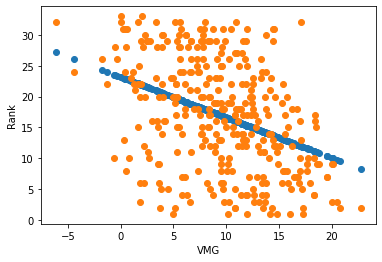

In [57]:
plt.scatter(X_test,reg.predict(X_test))
plt.scatter(X_test, y_test)
plt.xlabel("VMG")
plt.ylabel("Rank")

Il n'est pas pas possible de prédire le classement d'un skipper seulement selon la VMG